# EDA

**Summary**

The goal of the EDA is to understand the relationship between the variables, how they relate to Ames, IA housing market and which features are most beneficial to investors. Through this section, I evaluated each individual feature and compared it to the Sale Price. I started by evaluating the correlation of the features to the Sale Price.  If they were higher then a certain value (.13 in our case), I used data visualization techniques to investigate their potiential to investors.

##### EDA Organization




- Correlation

- Numeric Columns

- Categorical Columns

In [48]:
# Install Hvplot
#conda install -c pyviz hvplot

# Install Pandas Profiling for easy data analysis
# conda env create -n pandas-profiling
# conda activate pandas-profiling
# conda install -c conda-forge pandas-profiling

SyntaxError: invalid syntax (<ipython-input-48-d47b1db3ca49>, line 5)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000


In [2]:
# restore the data
%store -r ames
%store -r cat
%store -r features

In [3]:
ames.head()

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  109  533352170          60        RL          68.0     13517   Pave   
1  544  531379050          60        RL          43.0     11492   Pave   
2  153  535304180          20        RL          68.0      7922   Pave   
3  318  916386060          60        RL          73.0      9802   Pave   
4  255  906425045          50        RL          82.0     14235   Pave   

      Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
0  No Alley       IR1          Lvl    AllPub    CulDSac        Gtl   
1  No Alley       IR1          Lvl    AllPub    CulDSac        Gtl   
2  No Alley       Reg          Lvl    AllPub     Inside        Gtl   
3  No Alley       Reg          Lvl    AllPub     Inside        Gtl   
4  No Alley       IR1          Lvl    AllPub     Inside        Gtl   

  Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
0       Sawyer        RRAe        Norm      1Fam      2Story             6   
1      SawyerW        Norm        Norm      1Fam      2Story             7   
2        NAmes        Norm        Norm      1Fam      1Story             5   
3       Timber        Norm        Norm      1Fam      2Story             5   
4      SawyerW        Norm        Norm      1Fam      1.5Fin             6   

   Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
0             8        1976            2005      Gable   CompShg      HdBoard   
1             5        1996            1997      Gable   CompShg      VinylSd   
2             7        1953            2007      Gable   CompShg      VinylSd   
3             5        2006            2007      Gable   CompShg      VinylSd   
4             8        1900            1993      Gable   CompShg      Wd Sdng   

  Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
0      Plywood      BrkFace         289.0         Gd         TA     CBlock   
1      VinylSd      BrkFace         132.0         Gd         TA      PConc   
2      VinylSd         None           0.0         TA         Gd     CBlock   
3      VinylSd         None           0.0         TA         TA      PConc   
4      Plywood         None           0.0         TA         TA      PConc   

  Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
0        TA        TA            No            GLQ         533.0   
1        Gd        TA            No            GLQ         637.0   
2        TA        TA            No            GLQ         731.0   
3        Gd        TA            No            Unf           0.0   
4        Fa        Gd            No            Unf           0.0   

  BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC  \
0            Unf           0.0        192.0          725.0    GasA         Ex   
1            Unf           0.0        276.0          913.0    GasA         Ex   
2            Unf           0.0        326.0         1057.0    GasA         TA   
3            Unf           0.0        384.0          384.0    GasA         Gd   
4            Unf           0.0        676.0          676.0    GasA         TA   

  Central Air Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  \
0           Y      SBrkr         725         754                0   
1           Y      SBrkr         913        1209                0   
2           Y      SBrkr        1057           0                0   
3           Y      SBrkr         744         700                0   
4           Y      SBrkr         831         614                0   

   Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  \
0         1479             0.0             0.0          2          1   
1         2122             1.0             0.0          2          1   
2         1057             1.0             0.0          1          0   
3         1444             0.0             0.0          2          1   
4         1445             0.0            

In [4]:
ames.isnull().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area  

In [5]:
# List of categorical features
cat 

['MS SubClass',
 'MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type']

In [6]:
# List of numeric features
features

['Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'BsmtFin SF 2',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'Total Bsmt SF']

## Correlation

In [7]:
num_feat = ames[features]
num_feat['SalePrice'] = ames['SalePrice']

<ipython-input-7-826180e435a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_feat['SalePrice'] = ames['SalePrice']


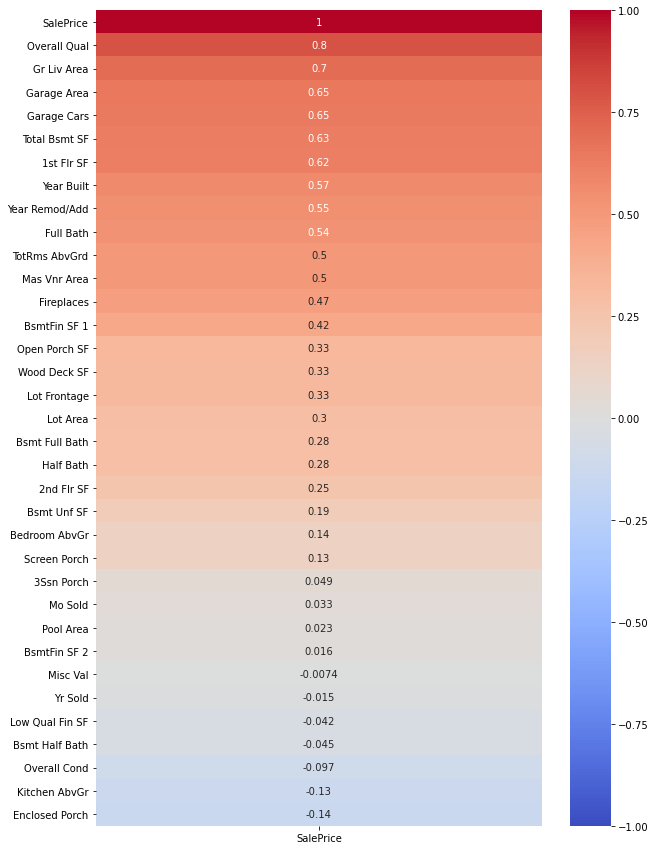

In [8]:
plt.figure(figsize = (10,15))
sns.heatmap(num_feat.corr()[['SalePrice']].sort_values('SalePrice', ascending = False), 
            vmax=1, 
            vmin= -1, 
            cmap = 'coolwarm', 
            annot = True)

This heatmap shows the correlation of the numeric features to the 'SalePrice' feature. Features focused on in the EDA process will be higher then .13.  There is a large drop off after .13 feature correlation.

## Numeric Features

In [9]:
len(features)

34

In [10]:
features

['Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'BsmtFin SF 2',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'Total Bsmt SF']

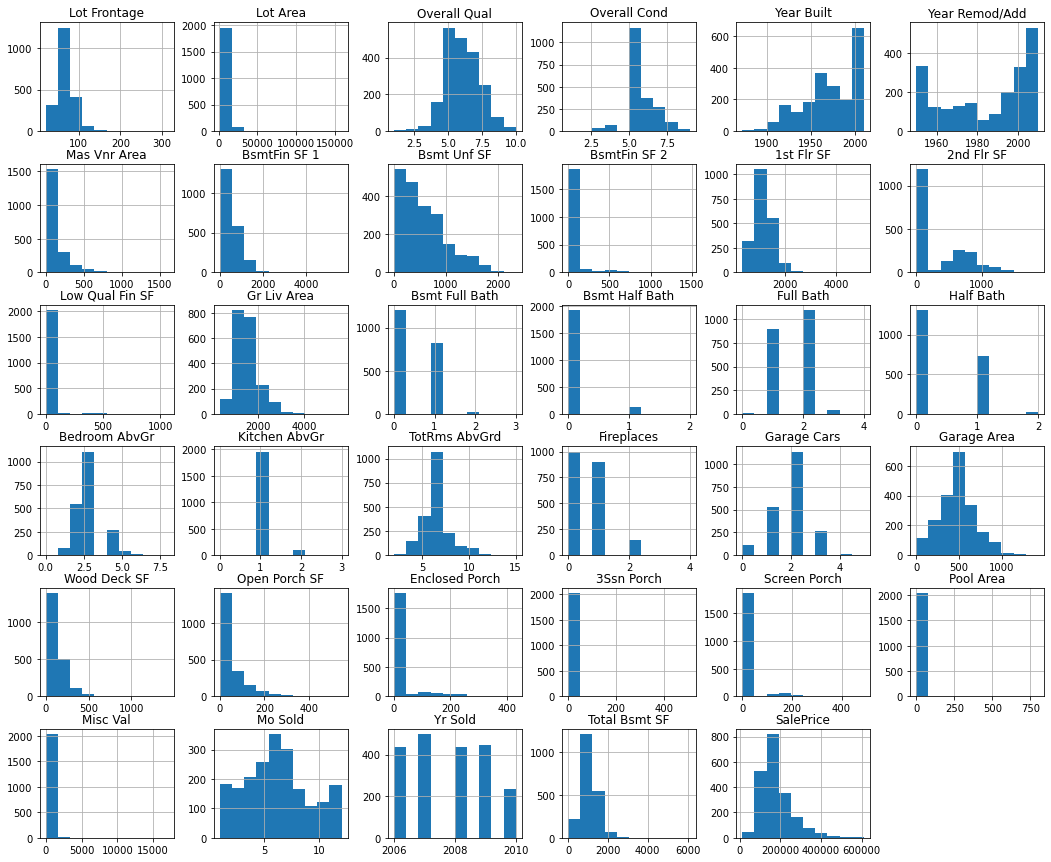

In [11]:
num_feat.hist(figsize = (18,15));

#### 'Lot Frontage' , 'Lot Area'

In [12]:
num_feat.hvplot(x='Lot Frontage', y='SalePrice', kind='scatter')

:Scatter   [Lot Frontage]   (SalePrice)

Hvplot is useful because we can hoover over the points to see which data.  
**There are two outliers: [313,24200] and [313,160000]**

Linear Regression line is greatly affected by outliers; will have to consider how to work with them.
    

In [13]:
num_feat.hvplot(x='Lot Area', y='SalePrice', kind='scatter')

:Scatter   [Lot Area]   (SalePrice)

**Outliers = [115149, 302000], [159000, 277000]**

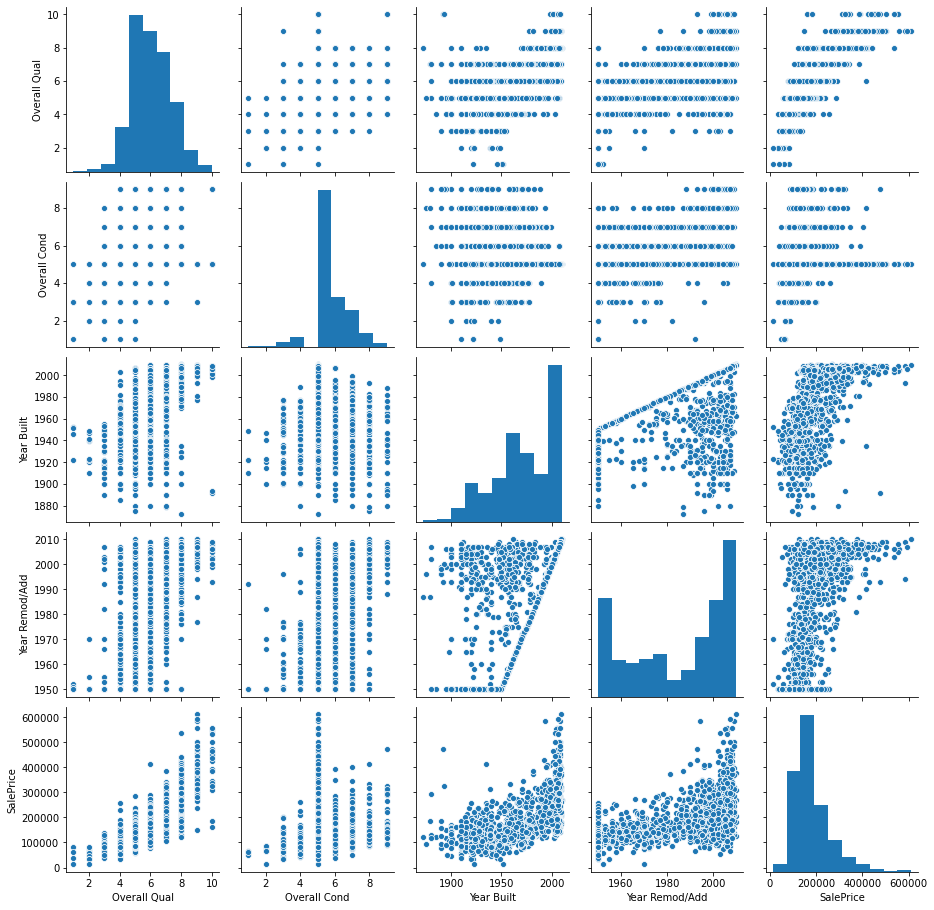

In [14]:
# 'Overall Qual','Overall Cond', 'Year Built','Year Remod/Add', 'Low Qual Fin SF'
feat = ['Overall Qual','Overall Cond', 'Year Built','Year Remod/Add','SalePrice']
sns.pairplot(ames[feat])


- Year built and Year Remodel's looks interesting, but you have to rememebr not all homes have been remodeled, or added features to the home.  If they did not, the value of the dataset is the year built.  This explain the line of points.

- Year built doesn't not have a strong with Overall Qual; However, 'Year Remod' is closely related to Quality which is good for investors

- SalePrice is closerly Overall Quality; Should consider as a Polynomial Engineering Feature



Text(0.5, 1.0, 'Sale Price in Relation to Mason Veneer Area')

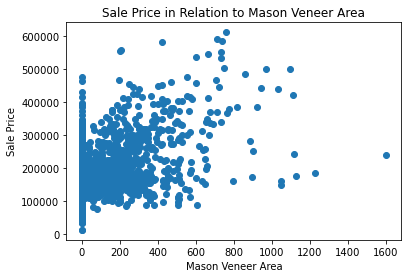

In [15]:
# 'Mas Vnr Area'
plt.scatter(ames['Mas Vnr Area'], ames['SalePrice']) # Slight correlation to Sale Price with more Mason Veneer Area
plt.xlabel('Mason Veneer Area')
plt.ylabel('Sale Price')
plt.title('Sale Price in Relation to Mason Veneer Area')

#### Basement

In [16]:
#'BsmtFin SF 1' ,'Bsmt Unf SF','BsmtFin SF 2','Bsmt Full Bath','Bsmt Half Bath','Total Bsmt SF'

num_feat.hvplot(x='BsmtFin SF 1', y='SalePrice', kind='scatter') #Might be a good polynomail feature

:Scatter   [BsmtFin SF 1]   (SalePrice)

**OUTLIERS: [115149,30200], [159000,277000]**

In [17]:
num_feat.hvplot(x='Bsmt Unf SF', y='SalePrice', kind='scatter')

:Scatter   [Bsmt Unf SF]   (SalePrice)

In [18]:
num_feat.hvplot(x='BsmtFin SF 2', y='SalePrice', kind='scatter')

:Scatter   [BsmtFin SF 2]   (SalePrice)

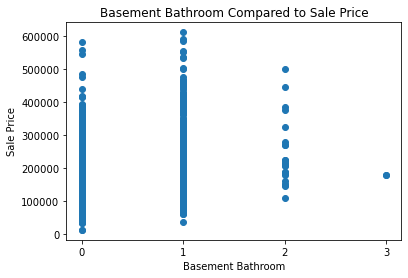

In [19]:
plt.scatter(ames['Bsmt Full Bath'], ames['SalePrice'])
plt.xlabel('Basement Bathroom')
plt.ylabel('Sale Price')
plt.title('Basement Bathroom Compared to Sale Price')
plt.xticks(ticks = [0,1,2,3]);

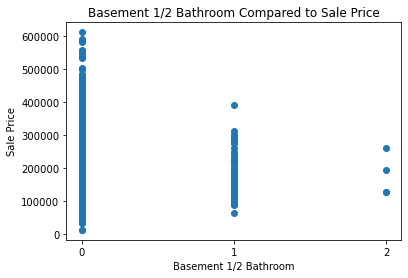

In [20]:
plt.scatter(ames['Bsmt Half Bath'], ames['SalePrice'])
plt.xlabel('Basement 1/2 Bathroom')
plt.ylabel('Sale Price')
plt.title('Basement 1/2 Bathroom Compared to Sale Price')
plt.xticks(ticks = [0,1,2]);

In [21]:
num_feat.hvplot(x='Total Bsmt SF', y='SalePrice', kind='scatter')

:Scatter   [Total Bsmt SF]   (SalePrice)

**OUTLIERS: [5095, 183850],[6610, 160000]**

In [22]:
#  '1st Flr SF', #  '2nd Flr SF',
num_feat.hvplot(x='1st Flr SF', y='SalePrice', kind='scatter')

:Scatter   [1st Flr SF]   (SalePrice)

**OUTLIERS: [4692,160000], [5095,183850]**

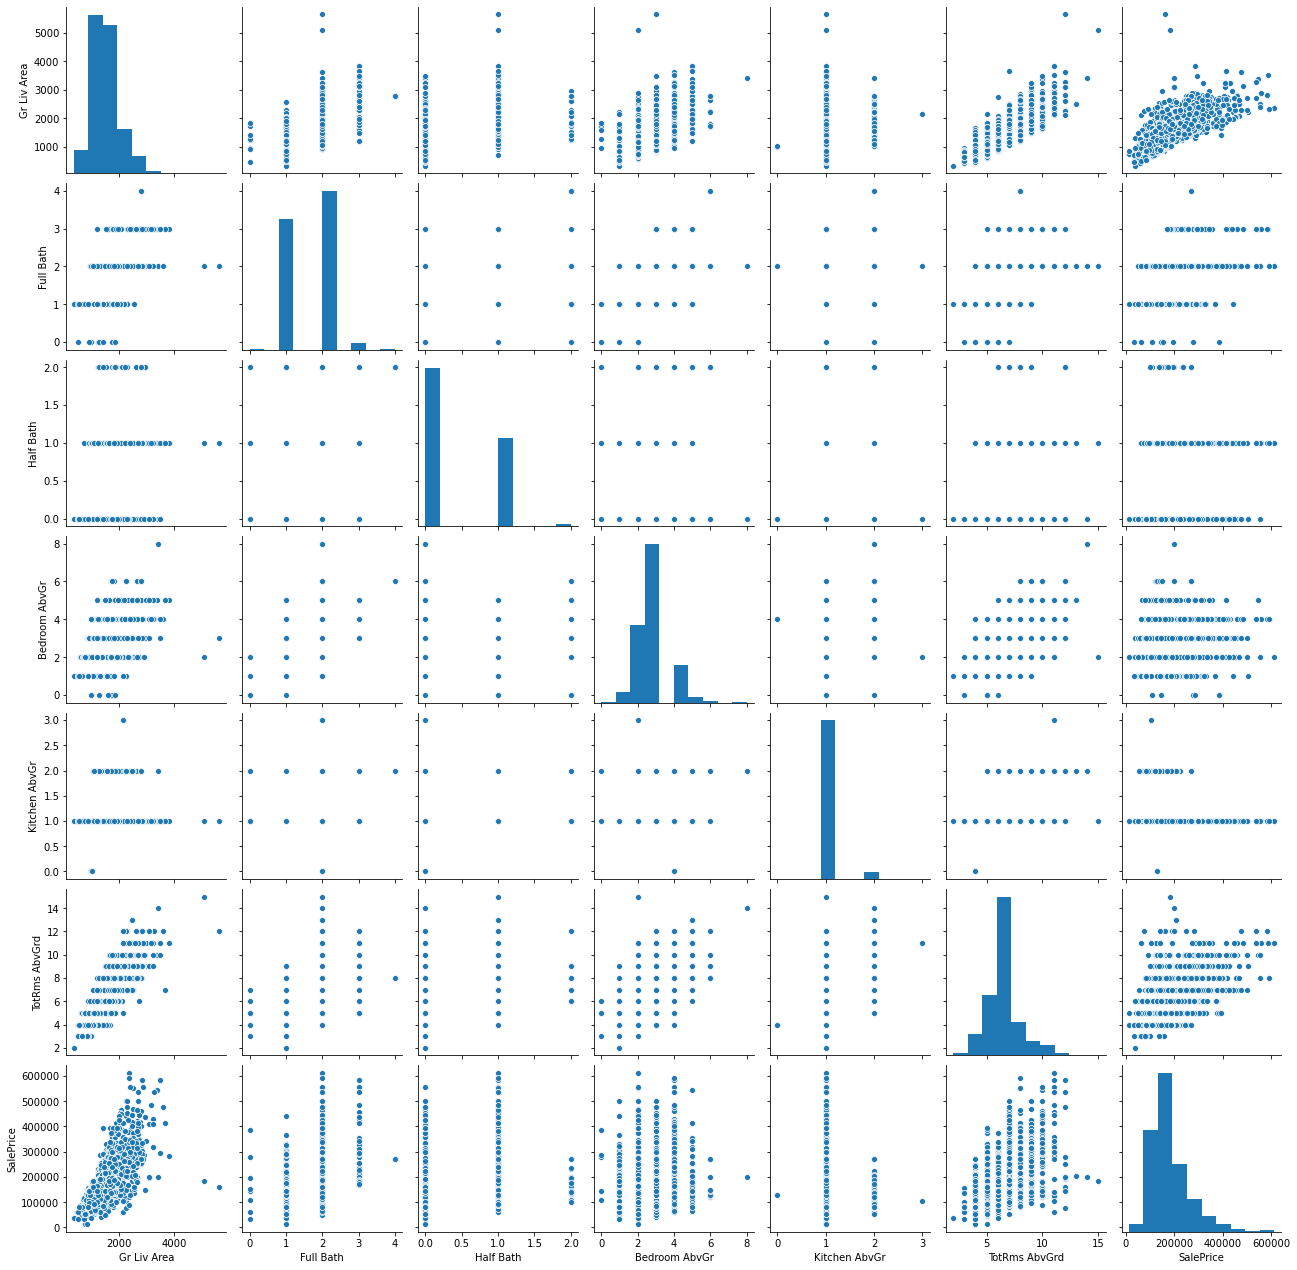

In [23]:
#  'Gr Liv Area','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd',
feat = ['Gr Liv Area','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','SalePrice']
sns.pairplot(num_feat[feat]);

- Sale Price tends to increase with all the feature except 'Kitchen AbvGr'

In [24]:
#  'Fireplaces',
num_feat.hvplot(x='Fireplaces', y='SalePrice', kind='scatter')

:Scatter   [Fireplaces]   (SalePrice)

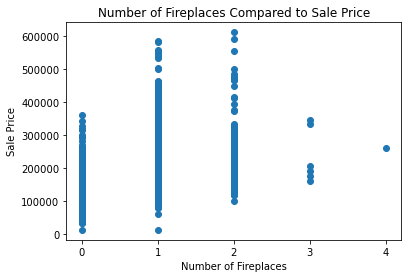

In [25]:
plt.scatter(ames['Fireplaces'], ames['SalePrice'])
plt.xlabel('Number of Fireplaces')
plt.ylabel('Sale Price')
plt.title('Number of Fireplaces Compared to Sale Price')
plt.xticks(ticks = [0,1,2,3,4]);

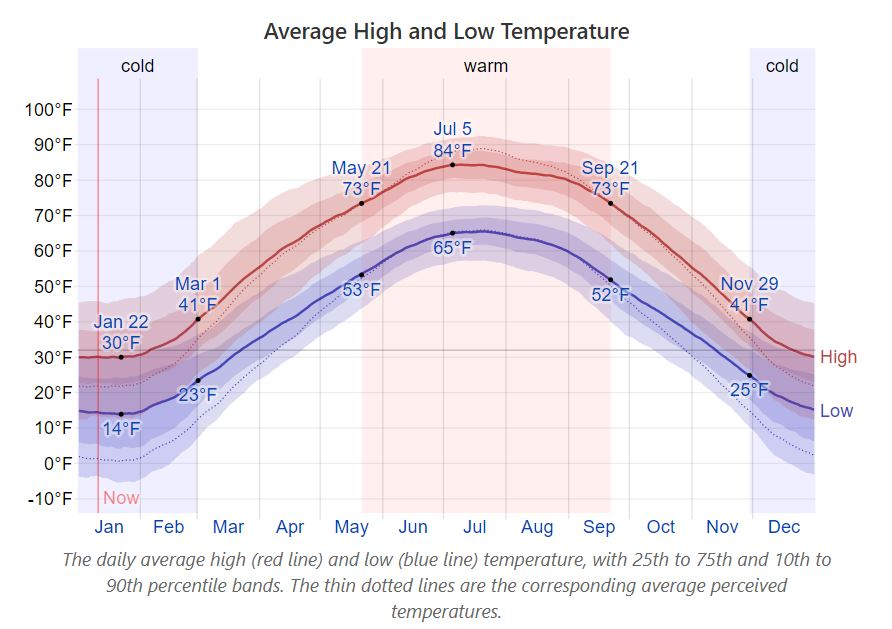

Source: https://weatherspark.com/y/10339/Average-Weather-in-Ames-Iowa-United-States-Year-Round#Sections-Temperature

There is a correlation with the number of fireplaces and the value of the house. Why? When we think of fireplaces, usually only colder places use them. Out of the 12 months in a year, only 4 months are warm. Even during these months, the temperature can drop at night.  A fireplace would be use in reducing the electricity bill, throughout the year and also an assurance for homeowners if their electricity goes out during the colder months.  

In [26]:
#  'Garage Cars',
#  'Garage Area',
num_feat.hvplot(x='Garage Cars', y='SalePrice', kind='scatter')


:Scatter   [Garage Cars]   (SalePrice)

(array([1.140e+02, 0.000e+00, 5.240e+02, 0.000e+00, 1.136e+03, 0.000e+00,
        2.630e+02, 0.000e+00, 1.300e+01, 1.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

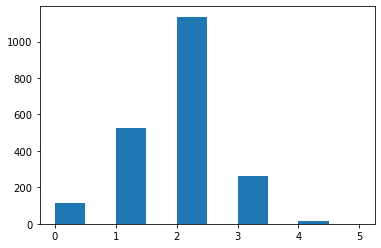

In [27]:
plt.hist(ames['Garage Cars'])

In [28]:
num_feat.hvplot(x='Garage Area', y='SalePrice', kind='scatter')

:Scatter   [Garage Area]   (SalePrice)

There is a relationship to the number of garages and home values.  3 car garages have the highest values, but more then 3 doesn't increase the value. 2 car garage homes do not increase as much as 3 car, but that may be because it is saturated because there is more 2 car garage homes then 1 car and 3 car garages homes combined.

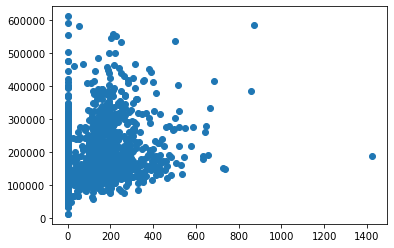

In [29]:
#  'Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val'
plt.scatter(ames['Wood Deck SF'], ames['SalePrice']);

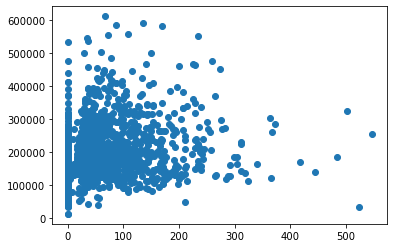

In [30]:
plt.scatter(ames['Open Porch SF'], ames['SalePrice']);

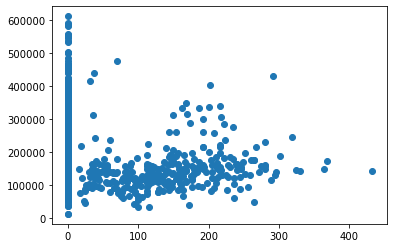

In [31]:
plt.scatter(ames['Enclosed Porch'], ames['SalePrice']);

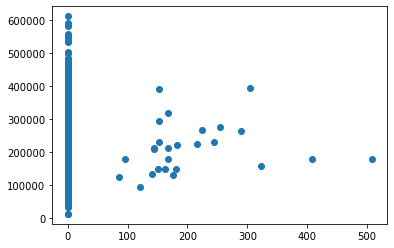

In [32]:
plt.scatter(ames['3Ssn Porch'], ames['SalePrice']);

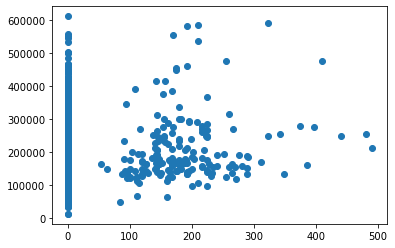

In [33]:
plt.scatter(ames['Screen Porch'], ames['SalePrice']);

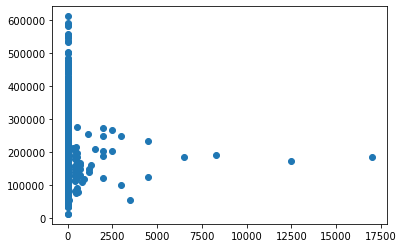

In [34]:
plt.scatter(ames['Misc Val'], ames['SalePrice']);

In [35]:
# HISTOGRAM- distribution of numeric data
# SCATTER- relationship between two variables
# BAR CHART- categorical variables with lengths and heights proportional to values
# LINE- NUMERIC VALUES OVER TIME
# BOX PLOTS - identify outliers

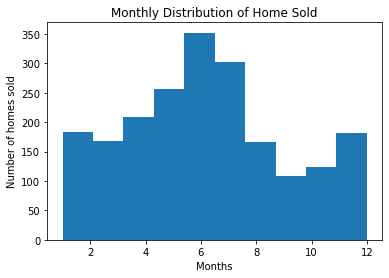

In [36]:
#'Mo Sold', 'Yr Sold'- best time to sell
 
plt.hist(num_feat['Mo Sold'])
plt.xlabel('Months')
plt.ylabel('Number of homes sold')
plt.title('Monthly Distribution of Home Sold');

May Through July tend to sell more homes.  This patten may be due to kids getting out school for summer break. The month with the least amount of home sold are in September. Weather does not seem to be a factor because the months of December thru February have average number of home sold.

In [37]:
ames['Yr Sold'] = ames['Yr Sold'].astype(int)

In [38]:
ames.hvplot.hist('Yr Sold', xticks = [2006,2007, 2008, 2009, 2010])

:Histogram   [Yr Sold]   (Yr Sold_count)

## Categorical Features 

In [39]:
cat

['MS SubClass',
 'MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type']

In [40]:
#  'MS SubClass',
#  'MS Zoning',

In [41]:
ames.groupby(['Neighborhood','MS SubClass'])['MS SubClass'].count()

Neighborhood  MS SubClass
Blmngtn       20               3
              120             19
Blueste       120              2
              160              4
BrDale        160             19
BrkSide       20               5
              30              15
              40               2
              45               5
              50              38
              70               8
              75               1
              190              2
ClearCr       20              11
              50               5
              60               6
              70               1
              80               1
              120              1
              150              1
              190              1
CollgCr       20              97
              60              70
              80               3
              85               2
              90               1
              120              7
Crawfor       20              16
              30               6
              50 

In [42]:
ames.groupby(['Neighborhood','MS Zoning'])['MS SubClass'].count()

Neighborhood  MS Zoning
Blmngtn       RL            20
              RM             2
Blueste       RM             6
BrDale        RM            19
BrkSide       RL            30
              RM            46
ClearCr       RL            27
CollgCr       RL           172
              RM             8
Crawfor       RH             1
              RL            63
              RM             7
Edwards       RH             1
              RL           133
              RM             9
Gilbert       RL           116
Greens        RL             3
GrnHill       RM             2
IDOTRR        A (agr)        1
              C (all)       19
              I (all)        1
              RM            48
Landmrk       RH             1
MeadowV       RM            24
Mitchel       A (agr)        1
              RL            74
              RM             7
NAmes         RH             4
              RL           306
NPkVill       RL            17
NWAmes        RL            87
NoRidge       R

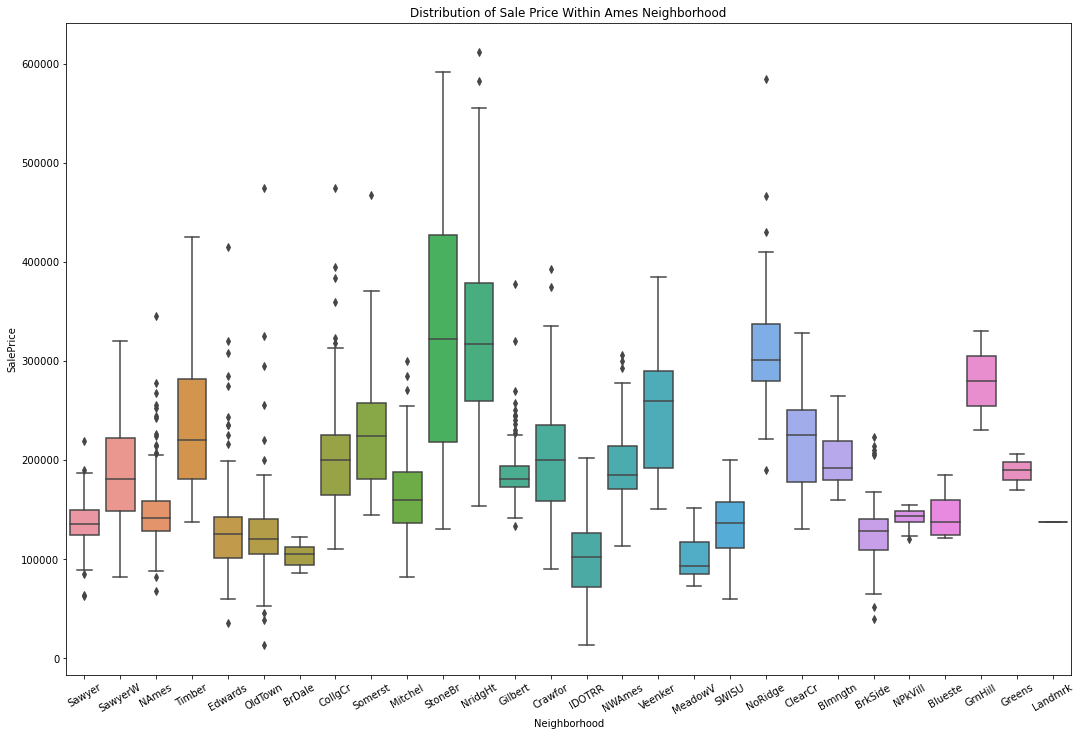

In [43]:
### Neighborhood
neighbor = ames[['Neighborhood','SalePrice']]
plt.figure(figsize = (18, 12))
plt.xticks(rotation = 30)
plt.title('Distribution of Sale Price Within Ames Neighborhood')
sns.boxplot(x= 'Neighborhood', y = neighbor['SalePrice'].sort_values(), data = neighbor,);
#Citation : https://matplotlib.org/3.1.1/gallery/ticks_and_spines/ticklabels_rotation.html
#Citation : https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

Box plots are great for the understanding the general statistic of the feature.  From this plot we can see the certain outliers in each neighborhood.

In [44]:
neighbor.hvplot.violin(y = 'SalePrice', by = 'Neighborhood', c= 'Neighborhood', ylabel = 'SalePrice',
                       legend = False,
                       width=900, height=500, padding=0.4, rot= 45 )

# citation : https://hvplot.holoviz.org/reference/pandas/violin.html


:Violin   [Neighborhood]   (SalePrice)

The violin plot above, allows us to see the distribution of sale prices in different neighborhoods. There is a wider distribution of home values in the Stone Brook neighborhood.  This is good for investing as it provides them the opportunity to buy homes at a lower rate, fix up the product and sell for a higher home value.  

In [45]:
#  'Street',
#  'Alley',
#  'Lot Shape',
#  'Land Contour',
#  'Utilities',
#  'Lot Config',
#  'Land Slope'

In [46]:
#  'Condition 1',
#  'Condition 2',
#  'Bldg Type',
#  'House Style',
#  'Roof Style',
#  'Roof Matl',
#  'Exterior 1st',
#  'Exterior 2nd',
#  'Mas Vnr Type',
#  'Exter Qual',
#  'Exter Cond',
#  'Foundation',
#  'Bsmt Qual',
#  'Bsmt Cond',
#  'Bsmt Exposure',
#  'BsmtFin Type 1',
#  'BsmtFin Type 2',
#  'Heating',
#  'Heating QC',
#  'Central Air',
#  'Electrical',
#  'Kitchen Qual',
#  'Functional',
#  'Fireplace Qu',
#  'Garage Type',
#  'Garage Finish',
#  'Garage Qual',
#  'Garage Cond',
#  'Paved Drive',

In [47]:
#  'Pool QC',

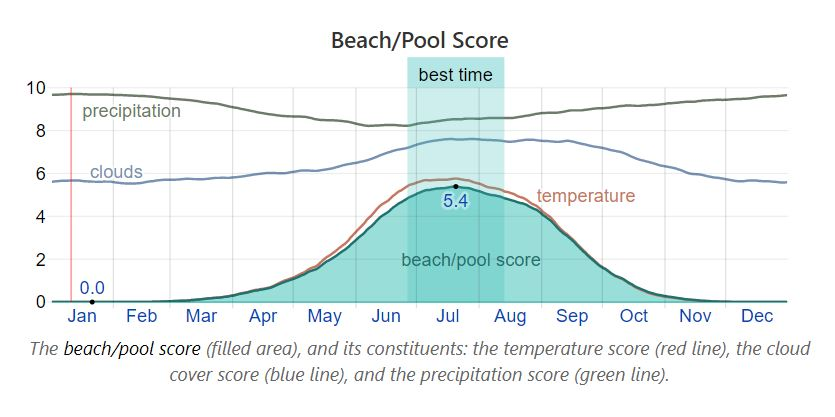

A pool would not be a good investment for the homeowner, or the homeowner.  Ames is a colder environment therefore would decrease the value of the home due to the maintence and likelihood of it being used.

In [ ]:
#  'Fence',
#  'Misc Feature',
#  'Sale Type'